In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib

In [2]:
csv_list = os.listdir('./csv/')

In [3]:
frames = []
for csv in csv_list:
    frames.append(pd.read_csv('./csv/'+csv))

In [4]:
full_validation = pd.concat(frames)

In [5]:
threshold_list = [ 0.1 ,  0.2,  0.3 ,  0.4,  0.5 ,  0.6,  0.7 ,  0.8,  0.9]

In [6]:
fcn8 = full_validation.loc[full_validation.model_name.str.contains('FCMN8'),:]
fcn16 = full_validation.loc[full_validation.model_name.str.contains('FCMN16'),:]
fcn32 = full_validation.loc[full_validation.model_name.str.contains('FCMN32'),:]

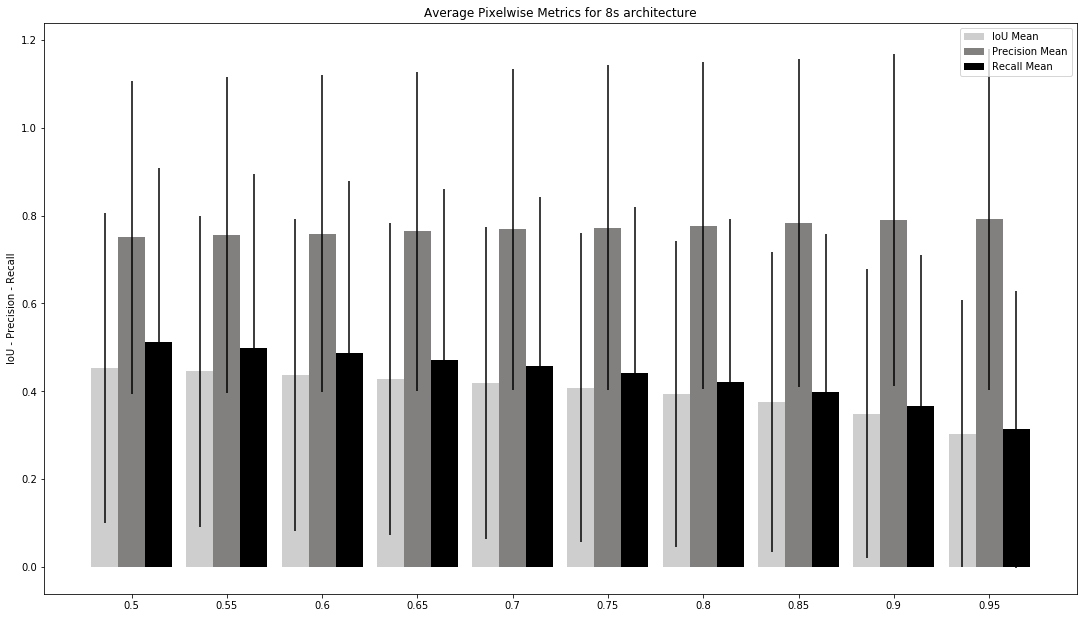

In [7]:
fcn8_rms = fcn8.loc[fcn8.model_name.str.contains('rmsprop'),:]
iou_mean = []
prec_mean = []
rec_mean = []
iou_std = []
prec_std = []
rec_std = []
for th in threshold_list:
    th_slice = fcn8_rms.loc[fcn8_rms.threshold == th, :]
    iou_mean.append(th_slice.iou.mean())
    iou_std.append(th_slice.iou.std())
    prec_list = []
    for i in np.arange(th_slice.shape[0]):
        if th_slice.segmentation_x_center.values[i] == np.nan:
            continue
        elif(th_slice.segmentation_area.values[i] == 0):
            prec_list.append(0)
        else:
            prec_list.append(th_slice.intersection.values[i] / th_slice.segmentation_area.values[i])
    prec_mean.append(np.mean(prec_list))
    prec_std.append(np.std(prec_list))
    rec_mean.append(np.mean(th_slice.intersection.values / th_slice.gt_area.values))
    rec_std.append(np.std(th_slice.intersection.values / th_slice.gt_area.values))
ind = np.arange(len(threshold_list))*3  # the x locations for the groups
width = 0.85  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind - width, iou_mean, width, yerr=iou_std,
                color='#cecece', label='IoU Mean')
ax.bar(ind, prec_mean, width, yerr=prec_std,
                color='#827f7f', label='Precision Mean')
ax.bar(ind + width, rec_mean, width, yerr=rec_std,
                color='#000000', label='Recall Mean')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('IoU - Precision - Recall')
ax.set_title('Average Pixelwise Metrics for 8s architecture')
ax.set_xticks(ind)
ax.set_xticklabels(threshold_list)
ax.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

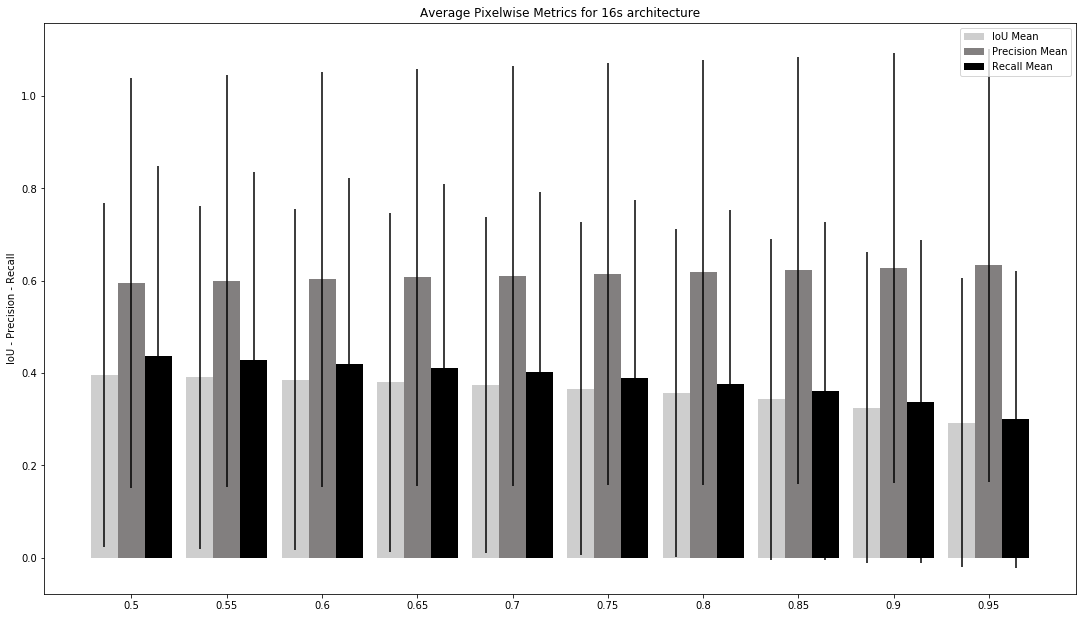

In [8]:
fcn16_rms = fcn16.loc[fcn16.model_name.str.contains('rmsprop'),:]
iou_mean = []
prec_mean = []
rec_mean = []
iou_std = []
prec_std = []
rec_std = []
for th in threshold_list:
    th_slice = fcn16_rms.loc[fcn16_rms.threshold == th, :]
    iou_mean.append(th_slice.iou.mean())
    iou_std.append(th_slice.iou.std())
    prec_list = []
    for i in np.arange(th_slice.shape[0]):
        if th_slice.segmentation_x_center.values[i] == np.nan:
            continue
        elif(th_slice.segmentation_area.values[i] == 0):
            prec_list.append(0)
        else:
            prec_list.append(th_slice.intersection.values[i] / th_slice.segmentation_area.values[i])
    prec_mean.append(np.mean(prec_list))
    prec_std.append(np.std(prec_list))
    rec_mean.append(np.mean(th_slice.intersection.values / th_slice.gt_area.values))
    rec_std.append(np.std(th_slice.intersection.values / th_slice.gt_area.values))
ind = np.arange(len(threshold_list))*3  # the x locations for the groups
width = 0.85  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind - width, iou_mean, width, yerr=iou_std,
                color='#cecece', label='IoU Mean')
ax.bar(ind, prec_mean, width, yerr=prec_std,
                color='#827f7f', label='Precision Mean')
ax.bar(ind + width, rec_mean, width, yerr=rec_std,
                color='#000000', label='Recall Mean')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('IoU - Precision - Recall')
ax.set_title('Average Pixelwise Metrics for 16s architecture')
ax.set_xticks(ind)
ax.set_xticklabels(threshold_list)
ax.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

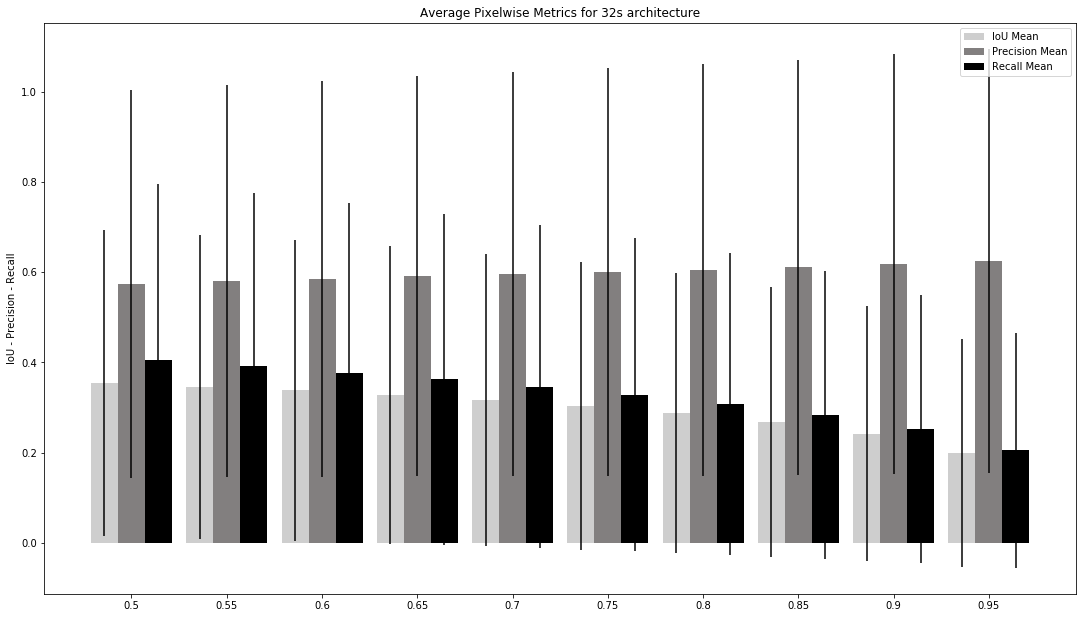

In [9]:
fcn32_rms = fcn32.loc[fcn32.model_name.str.contains('rmsprop'),:]
iou_mean = []
prec_mean = []
rec_mean = []
iou_std = []
prec_std = []
rec_std = []
for th in threshold_list:
    th_slice = fcn32_rms.loc[fcn32_rms.threshold == th, :]
    iou_mean.append(th_slice.iou.mean())
    iou_std.append(th_slice.iou.std())
    prec_list = []
    for i in np.arange(th_slice.shape[0]):
        if th_slice.segmentation_x_center.values[i] == np.nan:
            continue
        elif(th_slice.segmentation_area.values[i] == 0):
            prec_list.append(0)
        else:
            prec_list.append(th_slice.intersection.values[i] / th_slice.segmentation_area.values[i])
    prec_mean.append(np.mean(prec_list))
    prec_std.append(np.std(prec_list))
    rec_mean.append(np.mean(th_slice.intersection.values / th_slice.gt_area.values))
    rec_std.append(np.std(th_slice.intersection.values / th_slice.gt_area.values))
ind = np.arange(len(threshold_list))*3  # the x locations for the groups
width = 0.85  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind - width, iou_mean, width, yerr=iou_std,
                color='#cecece', label='IoU Mean')
ax.bar(ind, prec_mean, width, yerr=prec_std,
                color='#827f7f', label='Precision Mean')
ax.bar(ind + width, rec_mean, width, yerr=rec_std,
                color='#000000', label='Recall Mean')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('IoU - Precision - Recall')
ax.set_title('Average Pixelwise Metrics for 32s architecture')
ax.set_xticks(ind)
ax.set_xticklabels(threshold_list)
ax.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [2]:
valid = pd.read_csv('./0FCMN8rmsprop_lr0.0001_decay0_ep120_th_no_binarize.csv')
valid.columns

Index(['Unnamed: 0', 'threshold', 'sample', 'iou', 'intersection', 'union',
       'gt_area', 'segmentation_area', 'gt_x_center', 'gt_y_center',
       'segmentation_x_center', 'segmentation_y_center', 'x_distance',
       'y_distance', 'euclidean_distance', 'x_size', 'y_size'],
      dtype='object')

In [10]:
valid

,Unnamed: 0,threshold,sample,iou,intersection,union,gt_area,segmentation_area,gt_x_center,gt_y_center,segmentation_x_center,segmentation_y_center,x_distance,y_distance,euclidean_distance,x_size,y_size
0,0,0.1,0766.jpg,0.348560,2167,6217,5712,2672,639.0,448.0,638.0,466.0,1.0,-18.0,18.027756,1024,1024
1,1,0.1,0485.jpg,0.612738,10525,17177,10949,16753,486.0,550.0,481.0,558.0,5.0,-8.0,9.433981,1024,1024
2,2,0.1,0674.jpg,0.593740,5615,9457,6158,8914,532.0,456.0,539.0,469.0,-7.0,-13.0,14.764823,1024,1024
3,3,0.1,0417.jpg,0.875591,9079,10369,9470,9978,551.0,502.0,551.0,502.0,0.0,0.0,0.000000,1024,1024
4,4,0.1,0136.jpg,0.667444,2577,3861,2822,3616,523.0,515.0,517.0,517.0,6.0,-2.0,6.324555,1024,1024
5,5,0.1,0570.jpg,0.058015,1533,26424,25933,2024,415.0,583.0,458.0,668.0,-43.0,-85.0,95.257546,1024,1024
6,6,0.1,0119.jpg,0.822630,2152,2616,2184,2584,525.0,514.0,524.0,515.0,1.0,-1.0,1.414214,1024,1024
7,7,0.1,0595.jpg,0.932285,23130,24810,24013,23927,497.0,501.0,497.0,504.0,0.0,-3.0,3.000000,1024,1024
8,8,0.1,0758.jpg,0.582997,3614,6199,3620,6193,607.0,524.0,611.0,527.0,-4.0,-3.0,5.000000,1024,1024
9,9,0.1,0479.jpg,0.843697,8534,10115,8673,9976,473.0,460.0,475.0,459.0,-2.0,1.0,2.236068,1024,1024


In [3]:
dataset = pd.read_csv('./single_instance_dataset_wradius.csv')
dataset.columns

Index(['Unnamed: 0', 'imageOrigin', 'mask', 'patch_name', 'x_center_orig',
       'y_center_orig', 'x_center_resize', 'y_center_resize', 'diam_orig',
       'diam_resize'],
      dtype='object')

/home/wvillegas/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/wvillegas/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/wvillegas/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/wvillegas/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/wvillegas/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


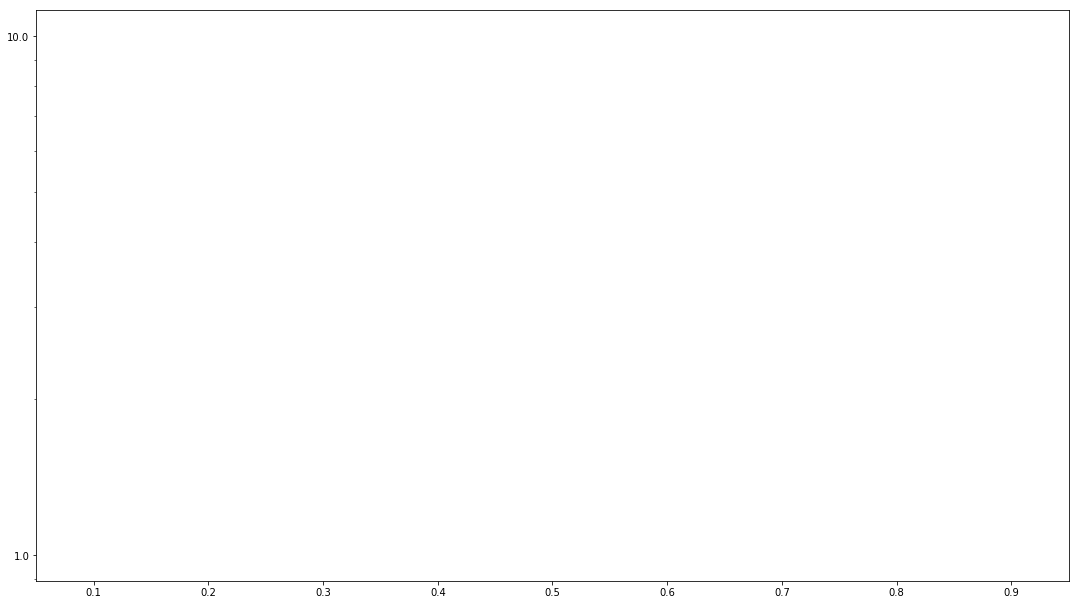

In [6]:
boxdata = [np.zeros(140) for std in range(len(threshold_list))]
for i in np.arange(0,len(threshold_list)):
    th_slice = valid.loc[valid['threshold'] == threshold_list[i]]
    for j in np.arange(th_slice.shape[0]):
        row = dataset.loc[dataset['imageOrigin'] == th_slice['sample'].values[j]]
        boxdata[i][j] =((th_slice['euclidean_distance'].values[j] / (row['diam_resize'].values[0]/2)))
# plt.errorbar(threshold_list, Y,yerr=yerr, linestyle='None', marker='.', ecolor='orange',markersize=10)
# plt.xlabel('Thresholds')
# plt.ylabel('Euclidean Distance Mean Norm')
# plt.tight_layout()
# rectangular box plot
fig1, ax1 = plt.subplots()
ax1.boxplot(boxdata, vert=True, patch_artist=True, labels=threshold_list)
ax1.set_yscale('log')
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [25]:
247/2

123.5

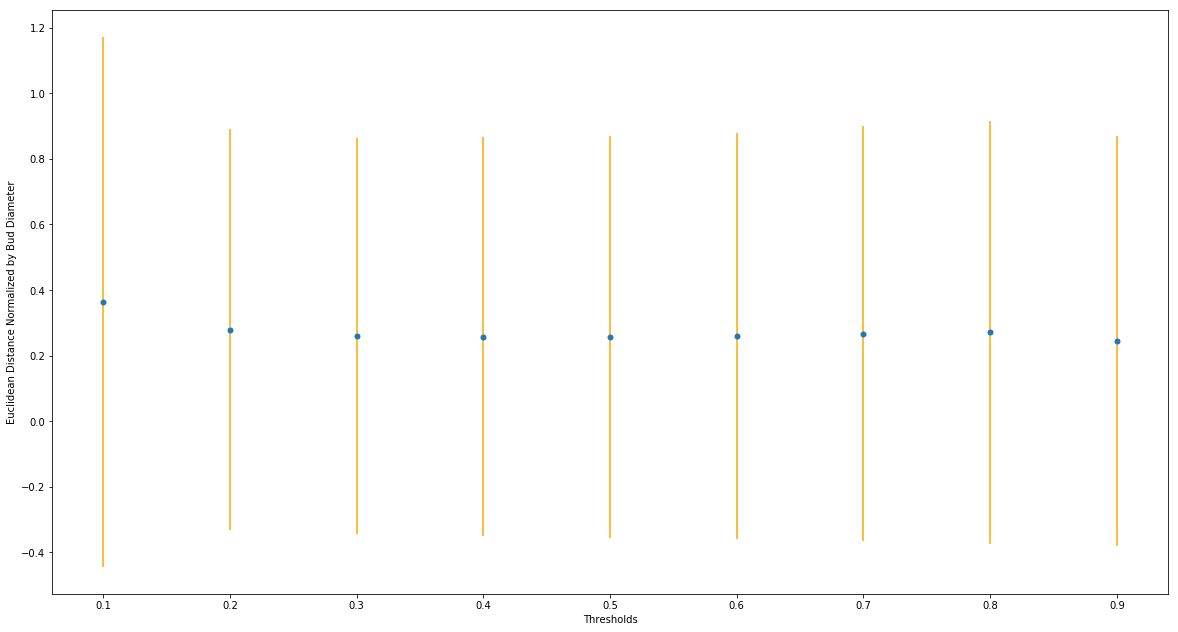

In [26]:
Y = []
acumList = []
yerr = []
for i in np.arange(0,len(threshold_list)):
    acumList = []
    th_slice = valid.loc[valid['threshold'] == threshold_list[i]]
    for j in np.arange(th_slice.shape[0]):
        row = dataset.loc[dataset['imageOrigin'] == th_slice['sample'].values[j]]
        if np.isnan(th_slice['euclidean_distance'].values[j]):
            continue
        else:
            acumList.append(th_slice['euclidean_distance'].values[j] / ((123.5)))

            
            
    Y.append(np.mean(acumList))
    yerr.append(np.std(acumList))

plt.errorbar(threshold_list, Y,yerr=yerr, linestyle='None', marker='.', ecolor='orange',markersize=10)
plt.xticks(threshold_list)
plt.xlabel('Thresholds')
plt.ylabel('Euclidean Distance Normalized by Bud Diameter')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [20]:
th_slice

,Unnamed: 0,threshold,sample,iou,intersection,union,gt_area,segmentation_area,gt_x_center,gt_y_center,segmentation_x_center,segmentation_y_center,x_distance,y_distance,euclidean_distance,x_size,y_size
1120,1120,0.9,0766.jpg,0.000000,0,5712,5712,0,639.0,448.0,NaN,NaN,NaN,NaN,NaN,1024,1024
1121,1121,0.9,0485.jpg,0.712660,9896,13886,10949,12833,486.0,550.0,481.0,561.0,5.0,-11.0,12.083046,1024,1024
1122,1122,0.9,0674.jpg,0.366154,2406,6571,6158,2819,532.0,456.0,540.0,462.0,-8.0,-6.0,10.000000,1024,1024
1123,1123,0.9,0417.jpg,0.828880,7910,9543,9470,7983,551.0,502.0,550.0,505.0,1.0,-3.0,3.162278,1024,1024
1124,1124,0.9,0136.jpg,0.148831,420,2822,2822,420,523.0,515.0,526.0,522.0,-3.0,-7.0,7.615773,1024,1024
1125,1125,0.9,0570.jpg,0.010257,266,25933,25933,266,415.0,583.0,461.0,668.0,-46.0,-85.0,96.648849,1024,1024
1126,1126,0.9,0119.jpg,0.756208,1675,2215,2184,1706,525.0,514.0,524.0,515.0,1.0,-1.0,1.414214,1024,1024
1127,1127,0.9,0595.jpg,0.781476,18807,24066,24013,18860,497.0,501.0,497.0,509.0,0.0,-8.0,8.000000,1024,1024
1128,1128,0.9,0758.jpg,0.770400,3446,4473,3620,4299,607.0,524.0,611.0,526.0,-4.0,-2.0,4.472136,1024,1024
1129,1129,0.9,0479.jpg,0.845632,7472,8836,8673,7635,473.0,460.0,476.0,460.0,-3.0,0.0,3.000000,1024,1024


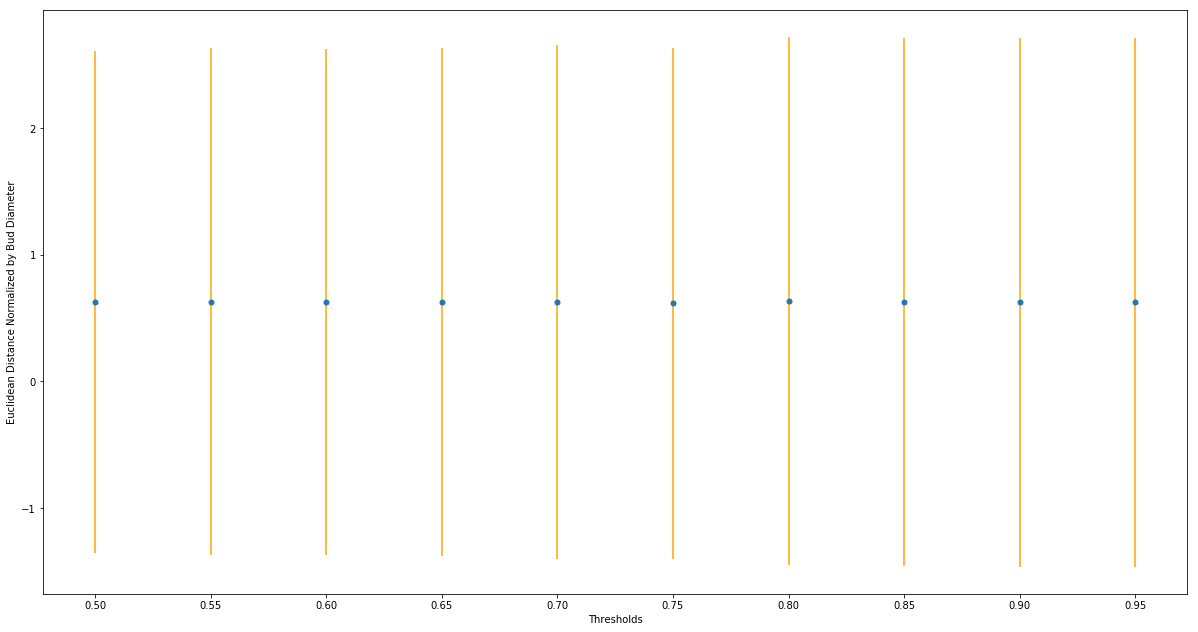

In [36]:
Y = []
acumList = []
yerr = []
for i in np.arange(0,len(threshold_list)):
    acumList = []
    th_slice = valid.loc[valid['threshold'] == threshold_list[i]]
    for j in np.arange(th_slice.shape[0]):
        row = dataset.loc[dataset['imageOrigin'] == th_slice['sample'].values[j]]

        if (row['diam_resize'].values[0]/2 < 1000):
            acumList.append(th_slice['euclidean_distance'].values[j] / ((row['diam_resize'].values[0]/2)))
        else:
            continue
    Y.append(np.mean(acumList))
    yerr.append(np.std(acumList))
# for i in np.arange(0,len(threshold_list)):
#     yerr.append(th_list[i]['euclidean_distance'].std())
plt.errorbar(threshold_list, Y,yerr=yerr, linestyle='None', marker='.', ecolor='orange',markersize=10)
plt.xticks(threshold_list)
plt.xlabel('Thresholds')
plt.ylabel('Euclidean Distance Normalized by Bud Diameter')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

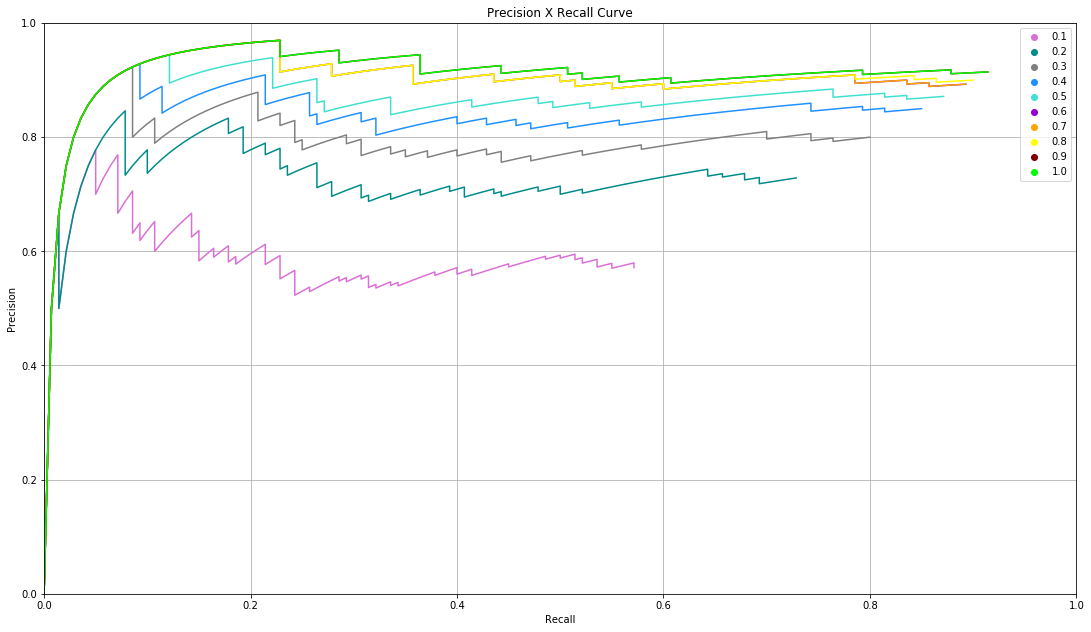

In [14]:
th_05 = valid.loc[valid['threshold'] == 0.5,:]
distance_list = []
colors = {'0.1': u'orchid', '0.2': u'darkcyan', '0.3': u'grey', '0.4': u'dodgerblue',
         '0.5': u'turquoise', '0.6': u'darkviolet', '0.7':u'orange', '0.8':u'yellow','0.9':u'maroon','1.0':u'lime'}
for sample in np.arange(th_05.shape[0]):
    row = dataset.loc[dataset['imageOrigin'] == th_slice['sample'].values[sample]]
    distance_list.append(th_slice['euclidean_distance'].values[sample] / ((row['diam_resize'].values[0]/2)))
tp = 0
fp = 0
pr_dict = {
    1:np.zeros((2,140)),
    2:np.zeros((2,140)),
    3:np.zeros((2,140)),
    4:np.zeros((2,140)),
    5:np.zeros((2,140)),
    6:np.zeros((2,140)),
    7:np.zeros((2,140)),
    8:np.zeros((2,140)),
    9:np.zeros((2,140)),
    10:np.zeros((2,140))
}
for i in [1,2,3,4,5,6,7,8,9,10]:
    tp = 0
    fp = 0
    for j in np.arange(140):
        if (distance_list[j] > i/10):
            fp+=1
        else:
            tp+=1
        pr_dict[i][0,j] = (tp/(tp+fp))
        pr_dict[i][1,j] = (tp/140)
for i in [1,2,3,4,5,6,7,8,9,10]:
    plt.plot(pr_dict[i][1,:],pr_dict[i][0,:], color=colors[str(i/10)])
plt.ylim((0,1))
plt.xlim((0,1))
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
plt.legend(markers, colors.keys(), numpoints=1)
plt.title('Precision X Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

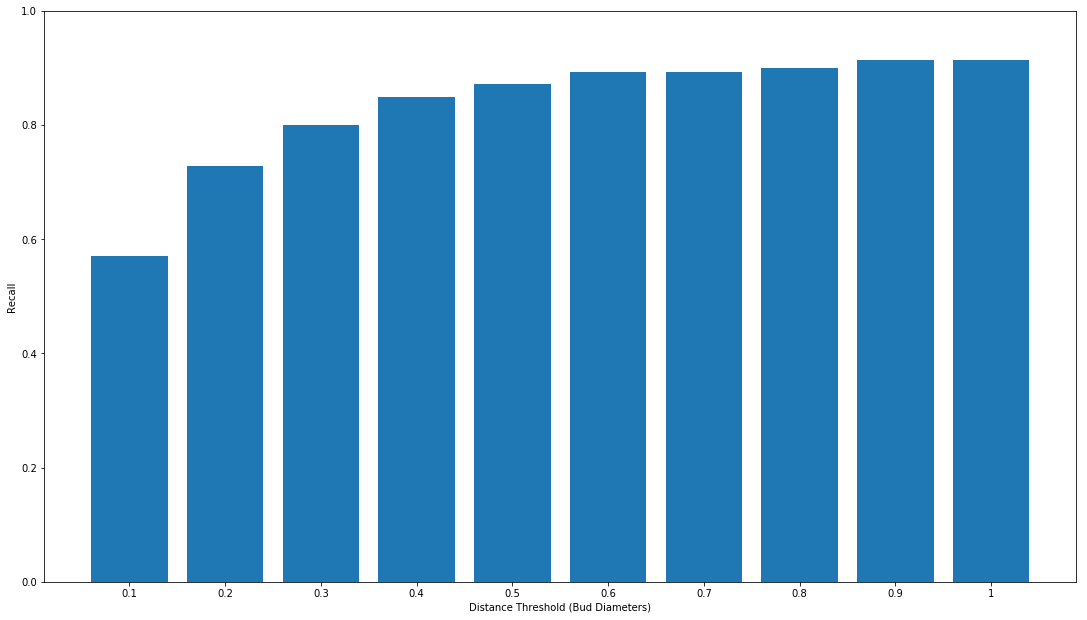

In [15]:
th_05 = valid.loc[valid['threshold'] == 0.5,:]
bud_recall = []
distance_list = []

th_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for sample in np.arange(th_05.shape[0]):
    row = dataset.loc[dataset['imageOrigin'] == th_slice['sample'].values[sample]]
    distance_list.append(th_slice['euclidean_distance'].values[sample] / ((row['diam_resize'].values[0]/2)))
for i in [1,2,3,4,5,6,7,8,9,10]:
    s = pd.Series(distance_list)
    s = s.where(s<(i/10), False)
    s = s.where(s == False, True)
    bud_recall.append(s.sum()/140)
plt.bar(x=[1,2,3,4,5,6,7,8,9,10],height=bud_recall,tick_label=['0.1', '0.2', '0.3' ,'0.4' ,'0.5' ,'0.6' ,'0.7' ,'0.8' ,'0.9', '1'])
plt.xlabel('Distance Threshold (Bud Diameters)')
plt.ylabel('Recall')
plt.ylim((0,1))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [17]:
dataset.describe()

,Unnamed: 0,x_center_orig,y_center_orig,x_center_resize,y_center_resize,diam_orig,diam_resize
count,698.00000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,348.50000,2461.551576,1744.981375,1021.568768,1036.366762,469.785100,247.287658
std,201.63953,401.465923,256.525842,97.013786,111.359334,320.558555,162.381768
min,0.00000,1228.000000,700.000000,665.000000,415.000000,78.000000,31.614458
25%,174.25000,2277.000000,1574.000000,966.000000,977.250000,252.250000,131.415205
50%,348.50000,2559.500000,1763.000000,1023.000000,1036.500000,357.500000,202.195448
75%,522.75000,2740.000000,1907.000000,1079.500000,1091.000000,536.000000,306.377510
max,697.00000,3480.000000,2552.000000,1309.000000,1434.000000,1716.000000,963.368421


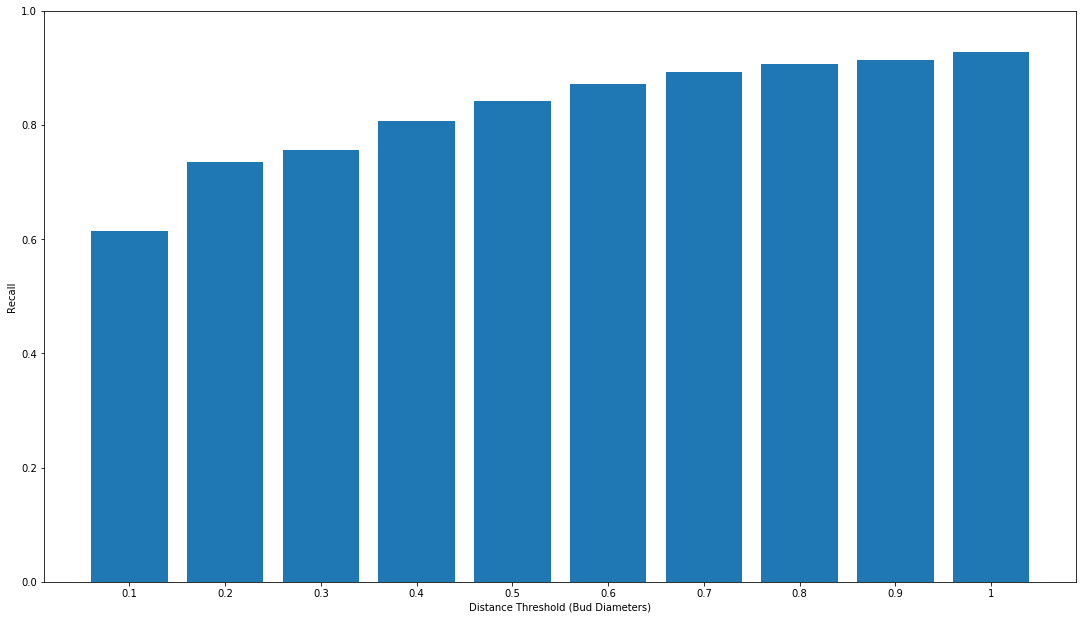

In [18]:
th_05 = valid.loc[valid['threshold'] == 0.5,:]
bud_recall = []
distance_list = []

th_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for sample in np.arange(th_05.shape[0]):
#     row = dataset.loc[dataset['imageOrigin'] == th_slice['sample'].values[sample]]
    distance_list.append(th_slice['euclidean_distance'].values[sample] / 124)
for i in [1,2,3,4,5,6,7,8,9,10]:
    s = pd.Series(distance_list)
    s = s.where(s<(i/10), False)
    s = s.where(s == False, True)
    bud_recall.append(s.sum()/140)
plt.bar(x=[1,2,3,4,5,6,7,8,9,10],height=bud_recall,tick_label=['0.1', '0.2', '0.3' ,'0.4' ,'0.5' ,'0.6' ,'0.7' ,'0.8' ,'0.9', '1'])
plt.xlabel('Distance Threshold (Bud Diameters)')
plt.ylabel('Recall')
plt.ylim((0,1))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

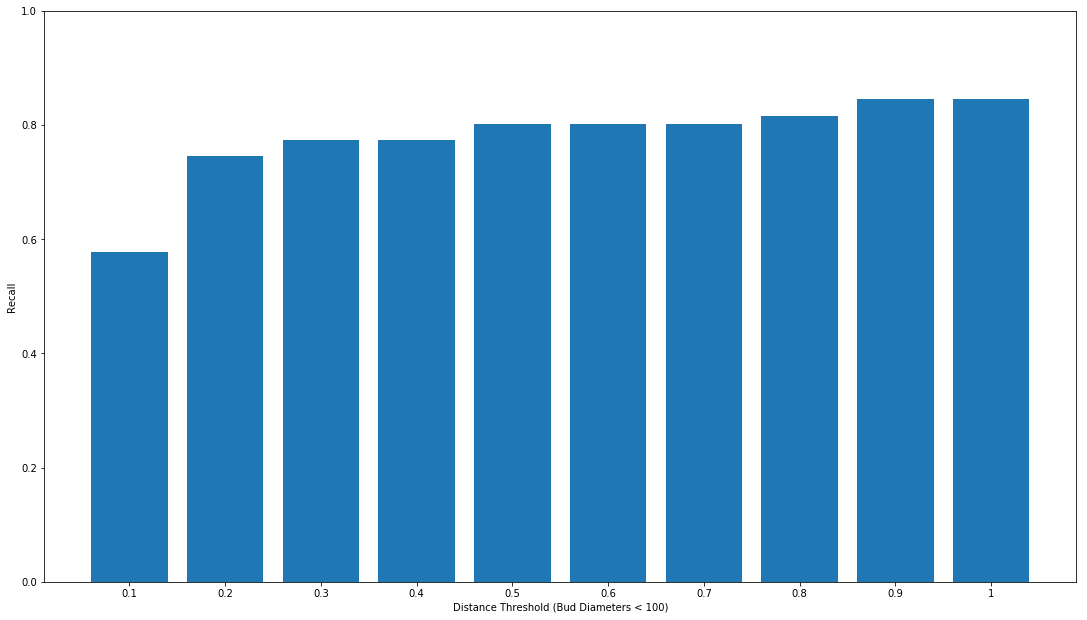

In [25]:
th_05 = valid.loc[valid['threshold'] == 0.5,:]
bud_recall = []
distance_list = []

th_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for sample in np.arange(th_05.shape[0]):
    row = dataset.loc[dataset['imageOrigin'] == th_slice['sample'].values[sample]]
    if row['diam_resize'].values[0]/2 < 100:
        distance_list.append(th_slice['euclidean_distance'].values[sample] / ((row['diam_resize'].values[0]/2)))
for i in [1,2,3,4,5,6,7,8,9,10]:
    s = pd.Series(distance_list)
    s = s.where(s<(i/10), False)
    s = s.where(s == False, True)
    bud_recall.append(s.sum()/s.shape[0])
plt.bar(x=[1,2,3,4,5,6,7,8,9,10],height=bud_recall,tick_label=['0.1', '0.2', '0.3' ,'0.4' ,'0.5' ,'0.6' ,'0.7' ,'0.8' ,'0.9', '1'])
plt.xlabel('Distance Threshold (Bud Diameters < 100)')
plt.ylabel('Recall')
plt.ylim((0,1))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

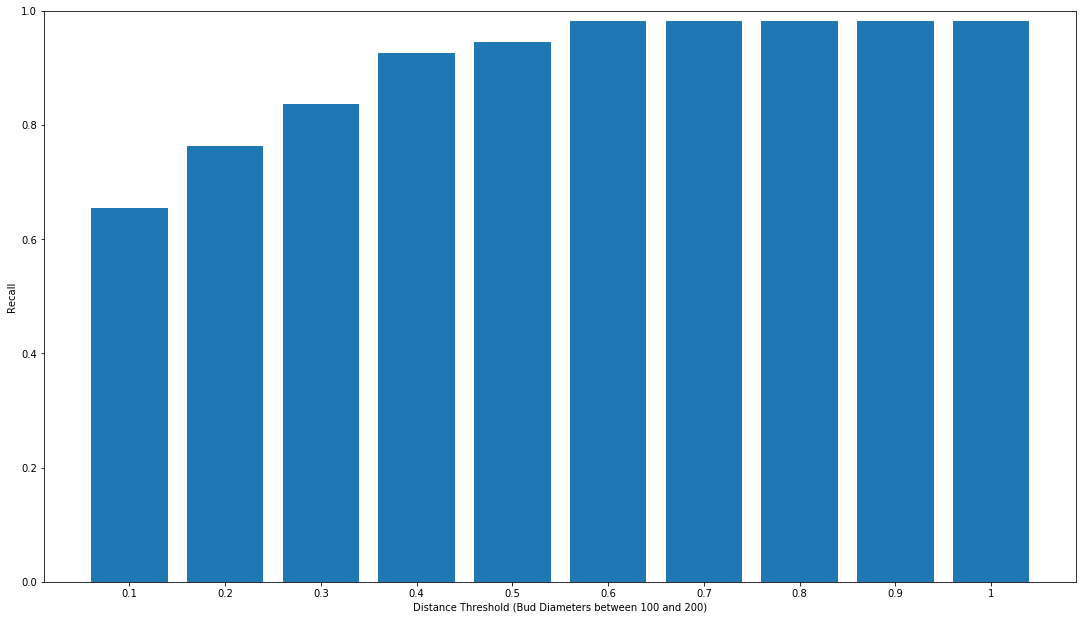

In [28]:
th_05 = valid.loc[valid['threshold'] == 0.5,:]
bud_recall = []
distance_list = []

th_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for sample in np.arange(th_05.shape[0]):
    row = dataset.loc[dataset['imageOrigin'] == th_slice['sample'].values[sample]]
    if row['diam_resize'].values[0]/2 < 200 and row['diam_resize'].values[0]/2 > 100:
        distance_list.append(th_slice['euclidean_distance'].values[sample] / ((row['diam_resize'].values[0]/2)))
for i in [1,2,3,4,5,6,7,8,9,10]:
    s = pd.Series(distance_list)
    s = s.where(s<(i/10), False)
    s = s.where(s == False, True)
    bud_recall.append(s.sum()/s.shape[0])
plt.bar(x=[1,2,3,4,5,6,7,8,9,10],height=bud_recall,tick_label=['0.1', '0.2', '0.3' ,'0.4' ,'0.5' ,'0.6' ,'0.7' ,'0.8' ,'0.9', '1'])
plt.xlabel('Distance Threshold (Bud Diameters between 100 and 200)')
plt.ylabel('Recall')
plt.ylim((0,1))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

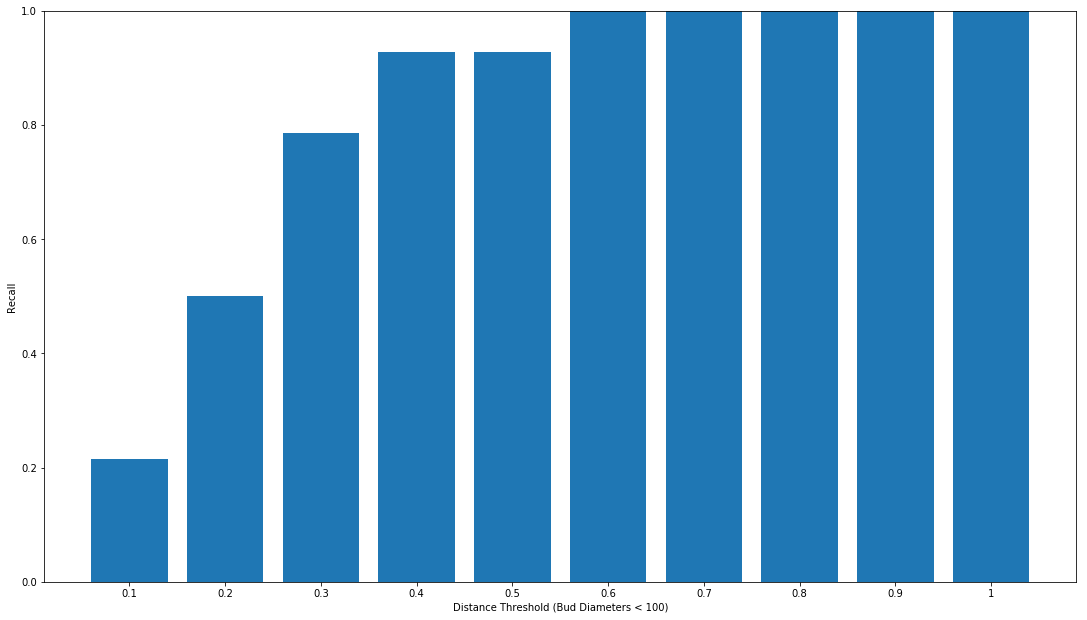

In [29]:
th_05 = valid.loc[valid['threshold'] == 0.5,:]
bud_recall = []
distance_list = []

th_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for sample in np.arange(th_05.shape[0]):
    row = dataset.loc[dataset['imageOrigin'] == th_slice['sample'].values[sample]]
    if row['diam_resize'].values[0]/2 > 200:
        distance_list.append(th_slice['euclidean_distance'].values[sample] / ((row['diam_resize'].values[0]/2)))
for i in [1,2,3,4,5,6,7,8,9,10]:
    s = pd.Series(distance_list)
    s = s.where(s<(i/10), False)
    s = s.where(s == False, True)
    bud_recall.append(s.sum()/s.shape[0])
plt.bar(x=[1,2,3,4,5,6,7,8,9,10],height=bud_recall,tick_label=['0.1', '0.2', '0.3' ,'0.4' ,'0.5' ,'0.6' ,'0.7' ,'0.8' ,'0.9', '1'])
plt.xlabel('Distance Threshold (Bud Diameters < 100)')
plt.ylabel('Recall')
plt.ylim((0,1))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)